In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats
from scipy.stats import boxcox, yeojohnson

%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
data = pd.read_csv("ready4training.csv")

In [4]:
X = data.drop('popularity', axis=1)
y = data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.head()

,explicit,danceability,mode,speechiness,acousticness,instrumentalness,valence,time_signature,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
97547,1,0.204126,1,-0.398034,-0.205937,-0.503064,-0.298645,4,0,0,0,0,1,0,0,0,0,0,0
27380,0,-0.991936,1,4.673269,-0.929519,0.624991,-0.962898,4,0,1,0,0,0,0,0,0,0,0,0
96609,0,0.175096,1,1.395141,-0.473042,-0.503049,-0.959036,3,0,0,0,0,0,0,1,0,0,0,0
86131,0,-0.469385,1,2.727288,0.188650,-0.502815,0.809730,4,0,0,0,0,0,0,1,0,0,0,0
21611,0,-1.061610,0,-0.054549,-0.937031,-0.046007,-0.935864,3,0,0,0,1,0,0,0,0,0,0,0


In [6]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV

<a id='1'>1 Обучение линейной регрессии</a>

In [7]:
params = {
    "alpha": [1e-3, 1e-2, 0.1, 1, 10, 1e3, 1e5],
}
model = Ridge()
ridge_regressor = GridSearchCV(estimator=model, param_grid=params, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'], refit='neg_mean_squared_error', n_jobs=-1)
ridge_regressor.fit(X_train, y_train)
preds = ridge_regressor.predict(X_test)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, preds)
print(
    """
    mse -> {mse}
    mae -> {mae}
    rmse -> {rmse}
    mape -> {mape}
    r2 -> {r2}
    """.format(mse=mse, mae=mae, rmse=rmse, mape=mape, r2=r2)
)
print(ridge_regressor.best_params_)


    mse -> 488.8996982837067
    mae -> 18.51529321190871
    rmse -> 22.111076370988968
    mape -> 2.152193716656925e+16
    r2 -> 0.023323197042441457
    
{'alpha': 10}


<a id='2'>2 Обучение SVM регрессии</a>

In [8]:
from sklearn import svm

params = {
    "C": np.logspace(start=-2, stop=1, num=10)
}

model = GridSearchCV(estimator=svm.LinearSVR(random_state=42), param_grid=params, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'], refit='neg_mean_squared_error', n_jobs=-1)
model.fit(X_train, y_train)
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, preds)
print(
    """
    mse -> {mse}
    mae -> {mae}
    rmse -> {rmse}
    mape -> {mape}
    r2 -> {r2}
    """.format(mse=mse, mae=mae, rmse=rmse, mape=mape, r2=r2)
)
print(model.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



    mse -> 498.8031019752922
    mae -> 18.390421488262053
    rmse -> 22.33390028578287
    mape -> 2.279590079860916e+16
    r2 -> 0.003539129492694526
    
{'C': 0.46415888336127775}


<a id='3'>3 Обучение DecisionTree регрессии</a>

In [9]:
from sklearn.tree import DecisionTreeRegressor
def print_results(preds, yhat):
    mse = mean_squared_error(yhat, preds)
    mae = mean_absolute_error(yhat, preds)
    r2 = r2_score(yhat, preds)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(yhat, preds)
    print(
        """
        mse -> {mse}
        mae -> {mae}
        rmse -> {rmse}
        mape -> {mape}
        r2 -> {r2}
        """.format(mse=mse, mae=mae, rmse=rmse, mape=mape, r2=r2)
    )
    
# params = {
#     "min_samples_split": [2, 3],
#     "max_features": ['sqrt', 'log2']
# }
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)
preds_train = model.predict(X_train)
print("~"*3 + "test results" + "~"*3)
print_results(preds, y_test)
print("~"*3 + "train results" + "~"*3)
print_results(preds_train, y_train)



~~~test results~~~

        mse -> 448.3968790332429
        mae -> 13.570147063528202
        rmse -> 21.17538379895965
        mape -> 5389375926984328.0
        r2 -> 0.10423583445085194
        
~~~train results~~~

        mse -> 20.176966799787934
        mae -> 0.6945978381630007
        rmse -> 4.491877870088181
        mape -> 897357824417728.2
        r2 -> 0.9597708211339882
        


In [10]:
path = model.cost_complexity_pruning_path(X_train, y_train)

In [11]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

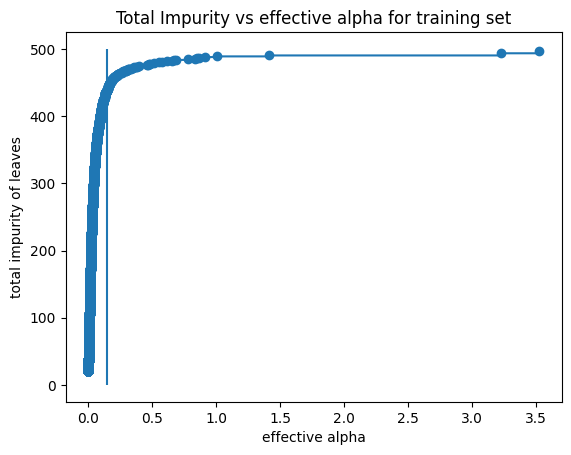

In [12]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
ax.vlines(x=0.15, ymin=0, ymax=500)

примерно на значении 0.15 impurity перестает расти быстро. Буду пробовать значения impurity от 0 до 0.15

In [13]:
ccp_alphas = np.linspace(start=0.001, stop=0.15, num=6)
ccp_alphas

array([0.001 , 0.0308, 0.0606, 0.0904, 0.1202, 0.15  ])

In [14]:
scores = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    score = mean_squared_error(preds, y_test)
    scores.append(score)

In [15]:
min_error = min(scores)
index = scores.index(min_error)
best_ccp_alpha = ccp_alphas[index]
best_ccp_alpha

0.0308

In [16]:
model = DecisionTreeRegressor(random_state=42, ccp_alpha=best_ccp_alpha)
model.fit(X_train, y_train)

preds = model.predict(X_test)
preds_train = model.predict(X_train)
print("~"*3 + "test results" + "~"*3)
print_results(preds, y_test)
print("~"*3 + "train results" + "~"*3)
print_results(preds_train, y_train)

~~~test results~~~

        mse -> 396.04322932231776
        mae -> 15.252479508122564
        rmse -> 19.90083489008232
        mape -> 1.0738407937457514e+16
        r2 -> 0.20882292133662494
        
~~~train results~~~

        mse -> 254.28214686021
        mae -> 12.294423490783105
        rmse -> 15.946226727982078
        mape -> 8156716022514243.0
        r2 -> 0.4930079396978344
        


<a id='4'>4 Обучение RandomForestRegressor</a>

In [17]:
from sklearn.ensemble import RandomForestRegressor

params = {
    "n_estimators": [50, 100, 150, 200, 250],
}
model = GridSearchCV(estimator=RandomForestRegressor(random_state=42, n_jobs=-1), param_grid=params, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'], refit='neg_mean_squared_error', n_jobs=-1)
model.fit(X_train, y_train)
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, preds)
print(
    """
    mse -> {mse}
    mae -> {mae}
    rmse -> {rmse}
    mape -> {mape}
    r2 -> {r2}
    """.format(mse=mse, mae=mae, rmse=rmse, mape=mape, r2=r2)
)
print(model.best_params_)


    mse -> 242.17627711414588
    mae -> 11.22408010618234
    rmse -> 15.562013915754795
    mape -> 7035027430623027.0
    r2 -> 0.5162035220836823
    
{'n_estimators': 250}


<a id='5'>5 Обучение AdaBoostRegressor</a>

In [18]:
from sklearn.ensemble import AdaBoostRegressor

params = {
    'learning_rate': np.logspace(start=0.001, stop=1.0, num=10)
}
model = GridSearchCV(estimator=AdaBoostRegressor(random_state=42), param_grid=params, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'], refit='neg_mean_squared_error', n_jobs=-1)
model.fit(X_train, y_train)
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, preds)
print(
    """
    mse -> {mse}
    mae -> {mae}
    rmse -> {rmse}
    mape -> {mape}
    r2 -> {r2}
    """.format(mse=mse, mae=mae, rmse=rmse, mape=mape, r2=r2)
)
print(model.best_params_)


    mse -> 486.2072496945553
    mae -> 18.543477848733136
    rmse -> 22.05010770256135
    mape -> 2.1509706628606256e+16
    r2 -> 0.02870191191874727
    
{'learning_rate': 1.2941958414499861}


<a id='6'>6 Обучение VotingRegressor</a>

In [19]:
from sklearn.ensemble import VotingRegressor

est1 = RandomForestRegressor(random_state=42, n_estimators=250, n_jobs=-1)
est2 = DecisionTreeRegressor(random_state=42, ccp_alpha=best_ccp_alpha)
model = VotingRegressor([('est1', est1), ('est2', est2)])
model.fit(X_train, y_train)
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, preds)
print(
    """
    mse -> {mse}
    mae -> {mae}
    rmse -> {rmse}
    mape -> {mape}
    r2 -> {r2}
    """.format(mse=mse, mae=mae, rmse=rmse, mape=mape, r2=r2)
)
del est1, est2


    mse -> 285.78311438662485
    mae -> 12.843612664639814
    rmse -> 16.905120951552664
    mape -> 8886717684040270.0
    r2 -> 0.4290899759639205
    


<a id='7'>7 Обучение НЕЙРОСЕТИ</a>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(1, activation='relu'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5120      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 3

In [21]:
import tensorflow.keras.callbacks as callbacks
from tensorflow.keras.callbacks import ModelCheckpoint

save_best = ModelCheckpoint(filepath="best_weights.hdf5",
                            monitor="val_root_mean_squared_error",
                            save_best_only=True,
                            mode="auto",
                            verbose=1)


plateau = callbacks.ReduceLROnPlateau(
    monitor='val_root_mean_squared_error',    
    factor = 0.2,
    patience = 3,                                                                                            
    verbose = 1,
    min_lr = 1e-5
) 

In [22]:
metrics = ['mae', 'root_mean_squared_error', 'mape', 'r2_score']

In [23]:
from tensorflow.keras.metrics import RootMeanSquaredError

model.compile(optimizer='adam', loss='mse', metrics=['mae', RootMeanSquaredError()])

In [24]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=50, 
                    validation_split=0.2, 
                    batch_size=128,
                    verbose=1, 
                    callbacks=[save_best, plateau]
                   )

Epoch 1/50
554/560 [============================>.] - ETA: 0s - loss: 534.4277 - mae: 19.0957 - root_mean_squared_error: 23.1177
Epoch 1: val_root_mean_squared_error improved from inf to 21.94366, saving model to best_weights.hdf5
560/560 [==============================] - 4s 5ms/step - loss: 533.9120 - mae: 19.0893 - root_mean_squared_error: 23.1065 - val_loss: 481.5243 - val_mae: 18.2181 - val_root_mean_squared_error: 21.9437 - lr: 0.0010
Epoch 2/50
555/560 [============================>.] - ETA: 0s - loss: 492.4168 - mae: 18.4338 - root_mean_squared_error: 22.1905
Epoch 2: val_root_mean_squared_error improved from 21.94366 to 21.92950, saving model to best_weights.hdf5
560/560 [==============================] - 3s 5ms/step - loss: 492.0770 - mae: 18.4286 - root_mean_squared_error: 22.1828 - val_loss: 480.9028 - val_mae: 18.2583 - val_root_mean_squared_error: 21.9295 - lr: 0.0010
Epoch 3/50
560/560 [==============================] - ETA: 0s - loss: 488.2264 - mae: 18.3172 - root_mean

Epoch 20/50
557/560 [============================>.] - ETA: 0s - loss: 465.7216 - mae: 17.8321 - root_mean_squared_error: 21.5806
Epoch 20: val_root_mean_squared_error improved from 21.56698 to 21.51177, saving model to best_weights.hdf5
560/560 [==============================] - 3s 5ms/step - loss: 465.5190 - mae: 17.8284 - root_mean_squared_error: 21.5759 - val_loss: 462.7563 - val_mae: 17.7465 - val_root_mean_squared_error: 21.5118 - lr: 0.0010
Epoch 21/50
555/560 [============================>.] - ETA: 0s - loss: 464.2400 - mae: 17.7965 - root_mean_squared_error: 21.5462
Epoch 21: val_root_mean_squared_error improved from 21.51177 to 21.51137, saving model to best_weights.hdf5
560/560 [==============================] - 2s 4ms/step - loss: 464.1308 - mae: 17.7950 - root_mean_squared_error: 21.5437 - val_loss: 462.7392 - val_mae: 17.7165 - val_root_mean_squared_error: 21.5114 - lr: 0.0010
Epoch 22/50
560/560 [==============================] - ETA: 0s - loss: 462.8025 - mae: 17.7558 -

560/560 [==============================] - 3s 5ms/step - loss: 443.5633 - mae: 17.2432 - root_mean_squared_error: 21.0609 - val_loss: 448.6457 - val_mae: 17.3465 - val_root_mean_squared_error: 21.1813 - lr: 2.0000e-04
Epoch 39/50
557/560 [============================>.] - ETA: 0s - loss: 443.0300 - mae: 17.2414 - root_mean_squared_error: 21.0483
Epoch 39: val_root_mean_squared_error improved from 21.18126 to 21.16651, saving model to best_weights.hdf5
560/560 [==============================] - 3s 4ms/step - loss: 443.0610 - mae: 17.2426 - root_mean_squared_error: 21.0490 - val_loss: 448.0213 - val_mae: 17.3213 - val_root_mean_squared_error: 21.1665 - lr: 2.0000e-04
Epoch 40/50
553/560 [============================>.] - ETA: 0s - loss: 443.1344 - mae: 17.2443 - root_mean_squared_error: 21.0508
Epoch 40: val_root_mean_squared_error improved from 21.16651 to 21.15790, saving model to best_weights.hdf5
560/560 [==============================] - 3s 5ms/step - loss: 443.0339 - mae: 17.2388 -

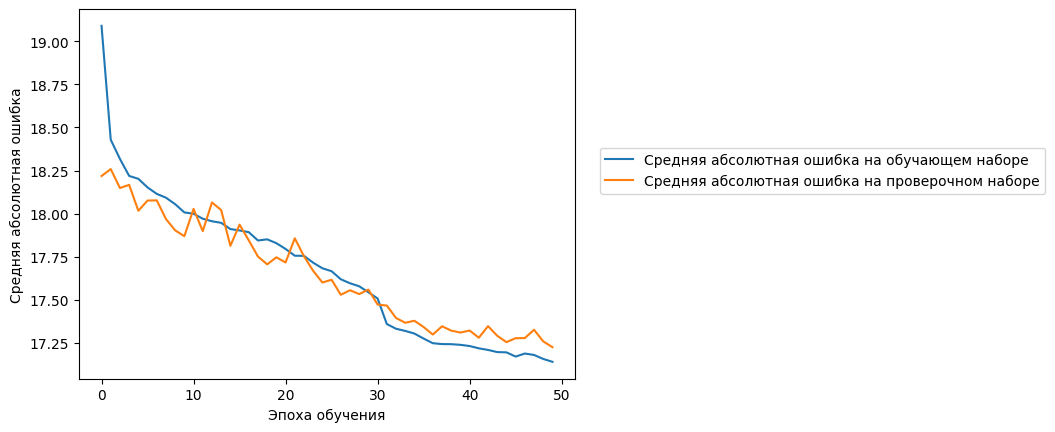

In [25]:
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend(loc=(1.05, 0.5))
plt.show()

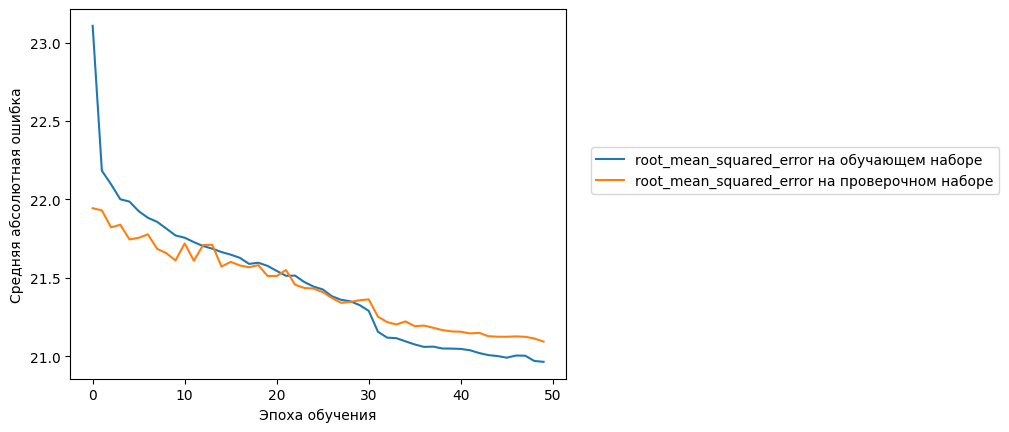

In [26]:
plt.plot(history.history['root_mean_squared_error'], 
         label='root_mean_squared_error на обучающем наборе')
plt.plot(history.history['val_root_mean_squared_error'], 
         label='root_mean_squared_error на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend(loc=(1.05, 0.5))
plt.show()

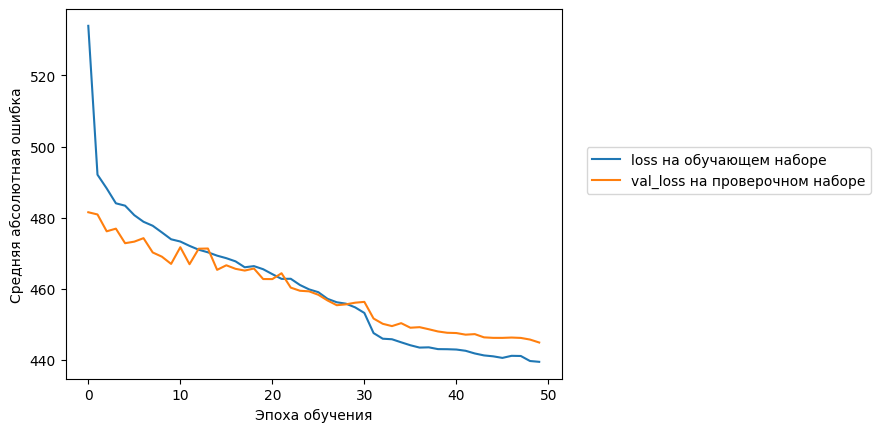

In [27]:
plt.plot(history.history['loss'], 
         label='loss на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='val_loss на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend(loc=(1.05, 0.5))
plt.show()

## Проверка на холд аут наборе

In [28]:
model.load_weights('best_weights.hdf5')
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, preds)
print(
    """
    mse -> {mse}
    mae -> {mae}
    rmse -> {rmse}
    mape -> {mape}
    r2 -> {r2}
    """.format(mse=mse, mae=mae, rmse=rmse, mape=mape, r2=r2)
)


    mse -> 445.4984883017255
    mae -> 17.290321515667593
    rmse -> 21.106835108602272
    mape -> 1.8906130316820376e+16
    r2 -> 0.11002596073507298
    


<a id='8'>8 Обучение catboost</a>

In [30]:
!pip show catboost

Name: catboost
Version: 1.2.7
Summary: CatBoost Python Package
Home-page: https://catboost.ai
Author: CatBoost Developers
Author-email: 
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.8/dist-packages
Requires: graphviz, matplotlib, numpy, pandas, plotly, scipy, six
Required-by: 


In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [41]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=1000,
                             learning_rate=0.07,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.3)
model.fit(X_train, y_train,
              eval_set=(X_val, y_val),
              use_best_model=True,
              verbose=True)


0:	learn: 22.2912801	test: 22.3352761	best: 22.3352761 (0)	total: 43.7ms	remaining: 43.6s
1:	learn: 22.2004646	test: 22.2593341	best: 22.2593341 (1)	total: 87.1ms	remaining: 43.5s
2:	learn: 22.1127524	test: 22.1846365	best: 22.1846365 (2)	total: 134ms	remaining: 44.7s
3:	learn: 22.0332782	test: 22.1132311	best: 22.1132311 (3)	total: 193ms	remaining: 48s
4:	learn: 21.9582692	test: 22.0529818	best: 22.0529818 (4)	total: 245ms	remaining: 48.7s
5:	learn: 21.8959086	test: 21.9983358	best: 21.9983358 (5)	total: 305ms	remaining: 50.5s
6:	learn: 21.8374353	test: 21.9468791	best: 21.9468791 (6)	total: 365ms	remaining: 51.8s
7:	learn: 21.7774568	test: 21.8982290	best: 21.8982290 (7)	total: 420ms	remaining: 52.1s
8:	learn: 21.7250648	test: 21.8527350	best: 21.8527350 (8)	total: 476ms	remaining: 52.4s
9:	learn: 21.6709969	test: 21.8111043	best: 21.8111043 (9)	total: 530ms	remaining: 52.4s
10:	learn: 21.6287253	test: 21.7796094	best: 21.7796094 (10)	total: 579ms	remaining: 52.1s
11:	learn: 21.58345

91:	learn: 19.8937860	test: 20.5976608	best: 20.5976608 (91)	total: 5.12s	remaining: 50.6s
92:	learn: 19.8806913	test: 20.5929463	best: 20.5929463 (92)	total: 5.18s	remaining: 50.5s
93:	learn: 19.8592544	test: 20.5786896	best: 20.5786896 (93)	total: 5.24s	remaining: 50.5s
94:	learn: 19.8417541	test: 20.5669827	best: 20.5669827 (94)	total: 5.3s	remaining: 50.5s
95:	learn: 19.8307640	test: 20.5617950	best: 20.5617950 (95)	total: 5.37s	remaining: 50.5s
96:	learn: 19.8089873	test: 20.5470972	best: 20.5470972 (96)	total: 5.43s	remaining: 50.5s
97:	learn: 19.7876890	test: 20.5379554	best: 20.5379554 (97)	total: 5.48s	remaining: 50.5s
98:	learn: 19.7807996	test: 20.5333419	best: 20.5333419 (98)	total: 5.53s	remaining: 50.3s
99:	learn: 19.7644749	test: 20.5232801	best: 20.5232801 (99)	total: 5.59s	remaining: 50.3s
100:	learn: 19.7493727	test: 20.5159449	best: 20.5159449 (100)	total: 5.65s	remaining: 50.3s
101:	learn: 19.7332162	test: 20.5068519	best: 20.5068519 (101)	total: 5.71s	remaining: 50

180:	learn: 18.7688017	test: 19.9796914	best: 19.9796914 (180)	total: 9.91s	remaining: 44.8s
181:	learn: 18.7628546	test: 19.9789245	best: 19.9789245 (181)	total: 9.96s	remaining: 44.8s
182:	learn: 18.7480398	test: 19.9682320	best: 19.9682320 (182)	total: 10s	remaining: 44.7s
183:	learn: 18.7400123	test: 19.9644725	best: 19.9644725 (183)	total: 10.1s	remaining: 44.6s
184:	learn: 18.7361774	test: 19.9644090	best: 19.9644090 (184)	total: 10.1s	remaining: 44.6s
185:	learn: 18.7279986	test: 19.9612709	best: 19.9612709 (185)	total: 10.2s	remaining: 44.5s
186:	learn: 18.7204149	test: 19.9575725	best: 19.9575725 (186)	total: 10.2s	remaining: 44.5s
187:	learn: 18.7103172	test: 19.9535310	best: 19.9535310 (187)	total: 10.3s	remaining: 44.4s
188:	learn: 18.6991811	test: 19.9473771	best: 19.9473771 (188)	total: 10.3s	remaining: 44.3s
189:	learn: 18.6882012	test: 19.9404139	best: 19.9404139 (189)	total: 10.4s	remaining: 44.2s
190:	learn: 18.6749815	test: 19.9331782	best: 19.9331782 (190)	total: 10

269:	learn: 17.8760475	test: 19.5655871	best: 19.5655871 (269)	total: 14.5s	remaining: 39.3s
270:	learn: 17.8660791	test: 19.5622267	best: 19.5622267 (270)	total: 14.6s	remaining: 39.3s
271:	learn: 17.8544128	test: 19.5554543	best: 19.5554543 (271)	total: 14.7s	remaining: 39.2s
272:	learn: 17.8478226	test: 19.5544436	best: 19.5544436 (272)	total: 14.7s	remaining: 39.2s
273:	learn: 17.8367082	test: 19.5484945	best: 19.5484945 (273)	total: 14.8s	remaining: 39.1s
274:	learn: 17.8311689	test: 19.5482691	best: 19.5482691 (274)	total: 14.8s	remaining: 39.1s
275:	learn: 17.8238743	test: 19.5459187	best: 19.5459187 (275)	total: 14.9s	remaining: 39s
276:	learn: 17.8198506	test: 19.5455953	best: 19.5455953 (276)	total: 14.9s	remaining: 39s
277:	learn: 17.8141577	test: 19.5420902	best: 19.5420902 (277)	total: 15s	remaining: 38.9s
278:	learn: 17.8040099	test: 19.5359468	best: 19.5359468 (278)	total: 15.1s	remaining: 38.9s
279:	learn: 17.7939896	test: 19.5308907	best: 19.5308907 (279)	total: 15.1s	

361:	learn: 17.1370222	test: 19.2453363	best: 19.2453363 (361)	total: 19.8s	remaining: 34.9s
362:	learn: 17.1308297	test: 19.2429167	best: 19.2429167 (362)	total: 19.9s	remaining: 34.9s
363:	learn: 17.1193537	test: 19.2397886	best: 19.2397886 (363)	total: 19.9s	remaining: 34.8s
364:	learn: 17.1133203	test: 19.2362375	best: 19.2362375 (364)	total: 20s	remaining: 34.7s
365:	learn: 17.1034450	test: 19.2312840	best: 19.2312840 (365)	total: 20s	remaining: 34.7s
366:	learn: 17.0943524	test: 19.2280632	best: 19.2280632 (366)	total: 20.1s	remaining: 34.6s
367:	learn: 17.0856333	test: 19.2237453	best: 19.2237453 (367)	total: 20.1s	remaining: 34.6s
368:	learn: 17.0793954	test: 19.2223595	best: 19.2223595 (368)	total: 20.2s	remaining: 34.5s
369:	learn: 17.0716030	test: 19.2185200	best: 19.2185200 (369)	total: 20.2s	remaining: 34.5s
370:	learn: 17.0600166	test: 19.2140791	best: 19.2140791 (370)	total: 20.3s	remaining: 34.4s
371:	learn: 17.0527681	test: 19.2093273	best: 19.2093273 (371)	total: 20.4

453:	learn: 16.4903894	test: 18.9813462	best: 18.9813462 (453)	total: 24.7s	remaining: 29.7s
454:	learn: 16.4838599	test: 18.9792572	best: 18.9792572 (454)	total: 24.8s	remaining: 29.7s
455:	learn: 16.4788769	test: 18.9772888	best: 18.9772888 (455)	total: 24.8s	remaining: 29.6s
456:	learn: 16.4712484	test: 18.9736837	best: 18.9736837 (456)	total: 24.9s	remaining: 29.6s
457:	learn: 16.4660372	test: 18.9708875	best: 18.9708875 (457)	total: 24.9s	remaining: 29.5s
458:	learn: 16.4607064	test: 18.9689933	best: 18.9689933 (458)	total: 25s	remaining: 29.4s
459:	learn: 16.4529606	test: 18.9666909	best: 18.9666909 (459)	total: 25s	remaining: 29.4s
460:	learn: 16.4472755	test: 18.9638435	best: 18.9638435 (460)	total: 25.1s	remaining: 29.3s
461:	learn: 16.4430392	test: 18.9638101	best: 18.9638101 (461)	total: 25.1s	remaining: 29.3s
462:	learn: 16.4370623	test: 18.9627319	best: 18.9627319 (462)	total: 25.2s	remaining: 29.2s
463:	learn: 16.4323912	test: 18.9617203	best: 18.9617203 (463)	total: 25.2

542:	learn: 15.9778238	test: 18.7918362	best: 18.7918362 (542)	total: 29.4s	remaining: 24.7s
543:	learn: 15.9725403	test: 18.7900665	best: 18.7900665 (543)	total: 29.4s	remaining: 24.7s
544:	learn: 15.9687802	test: 18.7881512	best: 18.7881512 (544)	total: 29.5s	remaining: 24.6s
545:	learn: 15.9634576	test: 18.7857440	best: 18.7857440 (545)	total: 29.5s	remaining: 24.6s
546:	learn: 15.9587804	test: 18.7849450	best: 18.7849450 (546)	total: 29.6s	remaining: 24.5s
547:	learn: 15.9532088	test: 18.7827051	best: 18.7827051 (547)	total: 29.6s	remaining: 24.4s
548:	learn: 15.9485774	test: 18.7811903	best: 18.7811903 (548)	total: 29.7s	remaining: 24.4s
549:	learn: 15.9408198	test: 18.7770051	best: 18.7770051 (549)	total: 29.8s	remaining: 24.4s
550:	learn: 15.9354518	test: 18.7744129	best: 18.7744129 (550)	total: 29.8s	remaining: 24.3s
551:	learn: 15.9290391	test: 18.7729675	best: 18.7729675 (551)	total: 29.9s	remaining: 24.2s
552:	learn: 15.9222851	test: 18.7694295	best: 18.7694295 (552)	total: 

634:	learn: 15.4908658	test: 18.6117930	best: 18.6117930 (634)	total: 34.7s	remaining: 19.9s
635:	learn: 15.4859329	test: 18.6090849	best: 18.6090849 (635)	total: 34.7s	remaining: 19.9s
636:	learn: 15.4765818	test: 18.6072163	best: 18.6072163 (636)	total: 34.8s	remaining: 19.8s
637:	learn: 15.4718821	test: 18.6060182	best: 18.6060182 (637)	total: 34.8s	remaining: 19.8s
638:	learn: 15.4652837	test: 18.6027335	best: 18.6027335 (638)	total: 34.9s	remaining: 19.7s
639:	learn: 15.4619467	test: 18.6003539	best: 18.6003539 (639)	total: 34.9s	remaining: 19.7s
640:	learn: 15.4581653	test: 18.5982817	best: 18.5982817 (640)	total: 35s	remaining: 19.6s
641:	learn: 15.4540421	test: 18.5963338	best: 18.5963338 (641)	total: 35.1s	remaining: 19.6s
642:	learn: 15.4489544	test: 18.5940694	best: 18.5940694 (642)	total: 35.1s	remaining: 19.5s
643:	learn: 15.4432345	test: 18.5924183	best: 18.5924183 (643)	total: 35.2s	remaining: 19.4s
644:	learn: 15.4364928	test: 18.5903989	best: 18.5903989 (644)	total: 35

725:	learn: 15.0332066	test: 18.4465627	best: 18.4465627 (725)	total: 39.5s	remaining: 14.9s
726:	learn: 15.0257149	test: 18.4434548	best: 18.4434548 (726)	total: 39.5s	remaining: 14.8s
727:	learn: 15.0208822	test: 18.4415940	best: 18.4415940 (727)	total: 39.6s	remaining: 14.8s
728:	learn: 15.0161620	test: 18.4389450	best: 18.4389450 (728)	total: 39.6s	remaining: 14.7s
729:	learn: 15.0119501	test: 18.4376831	best: 18.4376831 (729)	total: 39.7s	remaining: 14.7s
730:	learn: 15.0048478	test: 18.4353039	best: 18.4353039 (730)	total: 39.7s	remaining: 14.6s
731:	learn: 15.0020240	test: 18.4338810	best: 18.4338810 (731)	total: 39.8s	remaining: 14.6s
732:	learn: 14.9992455	test: 18.4334341	best: 18.4334341 (732)	total: 39.8s	remaining: 14.5s
733:	learn: 14.9948034	test: 18.4310375	best: 18.4310375 (733)	total: 39.9s	remaining: 14.5s
734:	learn: 14.9878489	test: 18.4284164	best: 18.4284164 (734)	total: 39.9s	remaining: 14.4s
735:	learn: 14.9819997	test: 18.4259899	best: 18.4259899 (735)	total: 

816:	learn: 14.6164181	test: 18.3097150	best: 18.3097150 (816)	total: 44.3s	remaining: 9.92s
817:	learn: 14.6119080	test: 18.3071577	best: 18.3071577 (817)	total: 44.4s	remaining: 9.87s
818:	learn: 14.6060589	test: 18.3054611	best: 18.3054611 (818)	total: 44.4s	remaining: 9.82s
819:	learn: 14.6018087	test: 18.3035143	best: 18.3035143 (819)	total: 44.5s	remaining: 9.77s
820:	learn: 14.5991342	test: 18.3020617	best: 18.3020617 (820)	total: 44.6s	remaining: 9.71s
821:	learn: 14.5970497	test: 18.3016062	best: 18.3016062 (821)	total: 44.6s	remaining: 9.66s
822:	learn: 14.5930109	test: 18.3008771	best: 18.3008771 (822)	total: 44.7s	remaining: 9.61s
823:	learn: 14.5892025	test: 18.3002382	best: 18.3002382 (823)	total: 44.7s	remaining: 9.55s
824:	learn: 14.5815775	test: 18.2981540	best: 18.2981540 (824)	total: 44.8s	remaining: 9.5s
825:	learn: 14.5755744	test: 18.2953098	best: 18.2953098 (825)	total: 44.9s	remaining: 9.45s
826:	learn: 14.5693845	test: 18.2928318	best: 18.2928318 (826)	total: 4

906:	learn: 14.2354112	test: 18.1827744	best: 18.1827744 (906)	total: 49.4s	remaining: 5.06s
907:	learn: 14.2311559	test: 18.1814571	best: 18.1814571 (907)	total: 49.4s	remaining: 5.01s
908:	learn: 14.2274990	test: 18.1808015	best: 18.1808015 (908)	total: 49.5s	remaining: 4.95s
909:	learn: 14.2247651	test: 18.1793498	best: 18.1793498 (909)	total: 49.5s	remaining: 4.9s
910:	learn: 14.2197113	test: 18.1785173	best: 18.1785173 (910)	total: 49.6s	remaining: 4.84s
911:	learn: 14.2160307	test: 18.1767821	best: 18.1767821 (911)	total: 49.7s	remaining: 4.79s
912:	learn: 14.2113071	test: 18.1755055	best: 18.1755055 (912)	total: 49.7s	remaining: 4.74s
913:	learn: 14.2080172	test: 18.1740485	best: 18.1740485 (913)	total: 49.8s	remaining: 4.68s
914:	learn: 14.2025107	test: 18.1732528	best: 18.1732528 (914)	total: 49.8s	remaining: 4.63s
915:	learn: 14.1963832	test: 18.1707111	best: 18.1707111 (915)	total: 49.9s	remaining: 4.57s
916:	learn: 14.1922432	test: 18.1679822	best: 18.1679822 (916)	total: 4

995:	learn: 13.8775098	test: 18.0718681	best: 18.0718681 (995)	total: 54s	remaining: 217ms
996:	learn: 13.8737299	test: 18.0701081	best: 18.0701081 (996)	total: 54s	remaining: 162ms
997:	learn: 13.8706310	test: 18.0693682	best: 18.0693682 (997)	total: 54s	remaining: 108ms
998:	learn: 13.8670653	test: 18.0685451	best: 18.0685451 (998)	total: 54.1s	remaining: 54.1ms
999:	learn: 13.8640947	test: 18.0672249	best: 18.0672249 (999)	total: 54.1s	remaining: 0us

bestTest = 18.06722495
bestIteration = 999



In [42]:
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, preds)
print(
    """
    mse -> {mse}
    mae -> {mae}
    rmse -> {rmse}
    mape -> {mape}
    r2 -> {r2}
    """.format(mse=mse, mae=mae, rmse=rmse, mape=mape, r2=r2)
)


    mse -> 328.0699356325211
    mae -> 14.363748889907411
    rmse -> 18.112700948023214
    mape -> 1.2354343837832418e+16
    r2 -> 0.34461343092479235
    


<a id='9'>9 Обучение VotingRegressor catboost + randomforest</a>

In [43]:
est1 = RandomForestRegressor(random_state=42, n_estimators=250, n_jobs=-1)
est2 = CatBoostRegressor(iterations=1000,
                             learning_rate=0.07,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.3)

model = VotingRegressor([('est1', est1), ('est2', est2)])
model.fit(X_train, y_train)
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, preds)
print(
    """
    mse -> {mse}
    mae -> {mae}
    rmse -> {rmse}
    mape -> {mape}
    r2 -> {r2}
    """.format(mse=mse, mae=mae, rmse=rmse, mape=mape, r2=r2)
)
del est1, est2

0:	learn: 22.2912801	total: 64.1ms	remaining: 1m 4s
1:	learn: 22.2004646	total: 116ms	remaining: 57.8s
2:	learn: 22.1127524	total: 176ms	remaining: 58.6s
3:	learn: 22.0332782	total: 240ms	remaining: 59.7s
4:	learn: 21.9582692	total: 295ms	remaining: 58.7s
5:	learn: 21.8959086	total: 351ms	remaining: 58.1s
6:	learn: 21.8374353	total: 410ms	remaining: 58.1s
7:	learn: 21.7774568	total: 465ms	remaining: 57.7s
8:	learn: 21.7250648	total: 525ms	remaining: 57.8s
9:	learn: 21.6709969	total: 586ms	remaining: 58s
10:	learn: 21.6287253	total: 635ms	remaining: 57.1s
11:	learn: 21.5834541	total: 684ms	remaining: 56.3s
12:	learn: 21.5475284	total: 735ms	remaining: 55.8s
13:	learn: 21.5007653	total: 789ms	remaining: 55.6s
14:	learn: 21.4590551	total: 839ms	remaining: 55.1s
15:	learn: 21.4209190	total: 894ms	remaining: 55s
16:	learn: 21.3917083	total: 951ms	remaining: 55s
17:	learn: 21.3701648	total: 1.01s	remaining: 55s
18:	learn: 21.3356802	total: 1.06s	remaining: 55s
19:	learn: 21.2986322	total: 1.

161:	learn: 18.9724649	total: 8.88s	remaining: 45.9s
162:	learn: 18.9608349	total: 8.94s	remaining: 45.9s
163:	learn: 18.9489859	total: 9s	remaining: 45.9s
164:	learn: 18.9353313	total: 9.06s	remaining: 45.9s
165:	learn: 18.9250783	total: 9.11s	remaining: 45.8s
166:	learn: 18.9147608	total: 9.18s	remaining: 45.8s
167:	learn: 18.9023277	total: 9.24s	remaining: 45.7s
168:	learn: 18.8866921	total: 9.29s	remaining: 45.7s
169:	learn: 18.8729592	total: 9.35s	remaining: 45.6s
170:	learn: 18.8613589	total: 9.41s	remaining: 45.6s
171:	learn: 18.8505085	total: 9.45s	remaining: 45.5s
172:	learn: 18.8355229	total: 9.5s	remaining: 45.4s
173:	learn: 18.8307624	total: 9.55s	remaining: 45.3s
174:	learn: 18.8261647	total: 9.61s	remaining: 45.3s
175:	learn: 18.8151806	total: 9.66s	remaining: 45.2s
176:	learn: 18.8073029	total: 9.72s	remaining: 45.2s
177:	learn: 18.7981330	total: 9.79s	remaining: 45.2s
178:	learn: 18.7913824	total: 9.85s	remaining: 45.2s
179:	learn: 18.7812483	total: 9.9s	remaining: 45.1

317:	learn: 17.4750727	total: 17.2s	remaining: 36.8s
318:	learn: 17.4709408	total: 17.2s	remaining: 36.7s
319:	learn: 17.4612827	total: 17.3s	remaining: 36.7s
320:	learn: 17.4539686	total: 17.3s	remaining: 36.6s
321:	learn: 17.4431667	total: 17.3s	remaining: 36.5s
322:	learn: 17.4317345	total: 17.4s	remaining: 36.5s
323:	learn: 17.4235622	total: 17.4s	remaining: 36.4s
324:	learn: 17.4095816	total: 17.5s	remaining: 36.3s
325:	learn: 17.4056857	total: 17.5s	remaining: 36.3s
326:	learn: 17.3994160	total: 17.6s	remaining: 36.2s
327:	learn: 17.3911537	total: 17.6s	remaining: 36.1s
328:	learn: 17.3811343	total: 17.7s	remaining: 36s
329:	learn: 17.3726320	total: 17.7s	remaining: 36s
330:	learn: 17.3655040	total: 17.8s	remaining: 35.9s
331:	learn: 17.3617081	total: 17.8s	remaining: 35.8s
332:	learn: 17.3537714	total: 17.9s	remaining: 35.8s
333:	learn: 17.3445113	total: 17.9s	remaining: 35.7s
334:	learn: 17.3357178	total: 18s	remaining: 35.7s
335:	learn: 17.3289762	total: 18s	remaining: 35.6s
3

474:	learn: 16.3763155	total: 24.9s	remaining: 27.5s
475:	learn: 16.3705865	total: 24.9s	remaining: 27.4s
476:	learn: 16.3632609	total: 25s	remaining: 27.4s
477:	learn: 16.3574156	total: 25s	remaining: 27.3s
478:	learn: 16.3531923	total: 25.1s	remaining: 27.3s
479:	learn: 16.3467075	total: 25.1s	remaining: 27.2s
480:	learn: 16.3402398	total: 25.2s	remaining: 27.2s
481:	learn: 16.3318232	total: 25.2s	remaining: 27.1s
482:	learn: 16.3286994	total: 25.2s	remaining: 27s
483:	learn: 16.3236961	total: 25.3s	remaining: 27s
484:	learn: 16.3176627	total: 25.3s	remaining: 26.9s
485:	learn: 16.3120633	total: 25.4s	remaining: 26.8s
486:	learn: 16.3045457	total: 25.4s	remaining: 26.8s
487:	learn: 16.2971719	total: 25.5s	remaining: 26.7s
488:	learn: 16.2929852	total: 25.5s	remaining: 26.7s
489:	learn: 16.2886480	total: 25.6s	remaining: 26.6s
490:	learn: 16.2835179	total: 25.6s	remaining: 26.6s
491:	learn: 16.2769440	total: 25.7s	remaining: 26.5s
492:	learn: 16.2700022	total: 25.7s	remaining: 26.5s
4

632:	learn: 15.4999295	total: 32.8s	remaining: 19s
633:	learn: 15.4946714	total: 32.9s	remaining: 19s
634:	learn: 15.4908658	total: 32.9s	remaining: 18.9s
635:	learn: 15.4859329	total: 33s	remaining: 18.9s
636:	learn: 15.4765818	total: 33s	remaining: 18.8s
637:	learn: 15.4718821	total: 33.1s	remaining: 18.8s
638:	learn: 15.4652837	total: 33.1s	remaining: 18.7s
639:	learn: 15.4619467	total: 33.2s	remaining: 18.7s
640:	learn: 15.4581653	total: 33.2s	remaining: 18.6s
641:	learn: 15.4540421	total: 33.3s	remaining: 18.6s
642:	learn: 15.4489544	total: 33.3s	remaining: 18.5s
643:	learn: 15.4432345	total: 33.4s	remaining: 18.5s
644:	learn: 15.4364928	total: 33.5s	remaining: 18.4s
645:	learn: 15.4314343	total: 33.5s	remaining: 18.4s
646:	learn: 15.4272680	total: 33.6s	remaining: 18.3s
647:	learn: 15.4218038	total: 33.6s	remaining: 18.3s
648:	learn: 15.4172221	total: 33.7s	remaining: 18.2s
649:	learn: 15.4142860	total: 33.7s	remaining: 18.1s
650:	learn: 15.4075035	total: 33.8s	remaining: 18.1s
6

788:	learn: 14.7419854	total: 41.6s	remaining: 11.1s
789:	learn: 14.7361637	total: 41.6s	remaining: 11.1s
790:	learn: 14.7296024	total: 41.7s	remaining: 11s
791:	learn: 14.7272535	total: 41.8s	remaining: 11s
792:	learn: 14.7243375	total: 41.8s	remaining: 10.9s
793:	learn: 14.7197277	total: 41.9s	remaining: 10.9s
794:	learn: 14.7151669	total: 41.9s	remaining: 10.8s
795:	learn: 14.7110691	total: 42s	remaining: 10.8s
796:	learn: 14.7051930	total: 42s	remaining: 10.7s
797:	learn: 14.7030409	total: 42s	remaining: 10.6s
798:	learn: 14.6980542	total: 42.1s	remaining: 10.6s
799:	learn: 14.6956004	total: 42.1s	remaining: 10.5s
800:	learn: 14.6907744	total: 42.2s	remaining: 10.5s
801:	learn: 14.6829462	total: 42.2s	remaining: 10.4s
802:	learn: 14.6773749	total: 42.3s	remaining: 10.4s
803:	learn: 14.6720113	total: 42.3s	remaining: 10.3s
804:	learn: 14.6658307	total: 42.4s	remaining: 10.3s
805:	learn: 14.6621186	total: 42.5s	remaining: 10.2s
806:	learn: 14.6602440	total: 42.5s	remaining: 10.2s
807

946:	learn: 14.0755123	total: 50s	remaining: 2.8s
947:	learn: 14.0720840	total: 50s	remaining: 2.74s
948:	learn: 14.0681159	total: 50.1s	remaining: 2.69s
949:	learn: 14.0638466	total: 50.1s	remaining: 2.64s
950:	learn: 14.0605750	total: 50.1s	remaining: 2.58s
951:	learn: 14.0551422	total: 50.2s	remaining: 2.53s
952:	learn: 14.0503426	total: 50.2s	remaining: 2.48s
953:	learn: 14.0464770	total: 50.3s	remaining: 2.42s
954:	learn: 14.0433645	total: 50.3s	remaining: 2.37s
955:	learn: 14.0395265	total: 50.4s	remaining: 2.32s
956:	learn: 14.0357226	total: 50.4s	remaining: 2.27s
957:	learn: 14.0304080	total: 50.5s	remaining: 2.21s
958:	learn: 14.0282683	total: 50.6s	remaining: 2.16s
959:	learn: 14.0245696	total: 50.6s	remaining: 2.11s
960:	learn: 14.0200615	total: 50.7s	remaining: 2.06s
961:	learn: 14.0160576	total: 50.7s	remaining: 2s
962:	learn: 14.0106856	total: 50.8s	remaining: 1.95s
963:	learn: 14.0080384	total: 50.8s	remaining: 1.9s
964:	learn: 14.0031975	total: 50.9s	remaining: 1.84s
96

<a id='10'>10 кросс валидация лучшего варианта</a>

In [45]:
from sklearn.model_selection import cross_validate

scoring = {
    'mse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'r2': 'r2'
}

est1 = RandomForestRegressor(random_state=42, n_estimators=250, n_jobs=-1)
est2 = CatBoostRegressor(iterations=1000,
                             learning_rate=0.07,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.3)

model = VotingRegressor([('est1', est1), ('est2', est2)])
scores = cross_validate(model, X, y, cv=5, scoring=scoring)

0:	learn: 22.2102046	total: 44.1ms	remaining: 44s
1:	learn: 22.1176780	total: 85.7ms	remaining: 42.8s
2:	learn: 22.0312857	total: 127ms	remaining: 42.3s
3:	learn: 21.9438080	total: 175ms	remaining: 43.5s
4:	learn: 21.8682819	total: 228ms	remaining: 45.4s
5:	learn: 21.7937425	total: 279ms	remaining: 46.2s
6:	learn: 21.7302847	total: 322ms	remaining: 45.7s
7:	learn: 21.6704669	total: 368ms	remaining: 45.7s
8:	learn: 21.6105826	total: 416ms	remaining: 45.8s
9:	learn: 21.5638679	total: 466ms	remaining: 46.2s
10:	learn: 21.5222582	total: 518ms	remaining: 46.6s
11:	learn: 21.4778232	total: 572ms	remaining: 47.1s
12:	learn: 21.4354973	total: 627ms	remaining: 47.6s
13:	learn: 21.3946840	total: 675ms	remaining: 47.6s
14:	learn: 21.3585702	total: 719ms	remaining: 47.2s
15:	learn: 21.3249382	total: 777ms	remaining: 47.8s
16:	learn: 21.2983636	total: 825ms	remaining: 47.7s
17:	learn: 21.2716450	total: 869ms	remaining: 47.4s
18:	learn: 21.2257166	total: 915ms	remaining: 47.2s
19:	learn: 21.2029459	

161:	learn: 18.7710816	total: 8.27s	remaining: 42.8s
162:	learn: 18.7594764	total: 8.31s	remaining: 42.7s
163:	learn: 18.7467953	total: 8.35s	remaining: 42.6s
164:	learn: 18.7377700	total: 8.4s	remaining: 42.5s
165:	learn: 18.7234385	total: 8.45s	remaining: 42.5s
166:	learn: 18.7162890	total: 8.5s	remaining: 42.4s
167:	learn: 18.7090833	total: 8.54s	remaining: 42.3s
168:	learn: 18.6959604	total: 8.58s	remaining: 42.2s
169:	learn: 18.6811161	total: 8.63s	remaining: 42.1s
170:	learn: 18.6725980	total: 8.67s	remaining: 42s
171:	learn: 18.6604894	total: 8.71s	remaining: 42s
172:	learn: 18.6510001	total: 8.76s	remaining: 41.9s
173:	learn: 18.6409673	total: 8.8s	remaining: 41.8s
174:	learn: 18.6348784	total: 8.85s	remaining: 41.7s
175:	learn: 18.6266061	total: 8.9s	remaining: 41.7s
176:	learn: 18.6177439	total: 8.94s	remaining: 41.6s
177:	learn: 18.6077942	total: 8.99s	remaining: 41.5s
178:	learn: 18.5931115	total: 9.06s	remaining: 41.5s
179:	learn: 18.5839713	total: 9.12s	remaining: 41.6s
1

320:	learn: 17.3156781	total: 17s	remaining: 35.9s
321:	learn: 17.3077574	total: 17s	remaining: 35.8s
322:	learn: 17.3020664	total: 17s	remaining: 35.7s
323:	learn: 17.2987961	total: 17.1s	remaining: 35.6s
324:	learn: 17.2875677	total: 17.1s	remaining: 35.6s
325:	learn: 17.2792276	total: 17.2s	remaining: 35.5s
326:	learn: 17.2711687	total: 17.2s	remaining: 35.5s
327:	learn: 17.2648425	total: 17.3s	remaining: 35.4s
328:	learn: 17.2594197	total: 17.3s	remaining: 35.4s
329:	learn: 17.2539429	total: 17.4s	remaining: 35.3s
330:	learn: 17.2426316	total: 17.4s	remaining: 35.3s
331:	learn: 17.2351769	total: 17.5s	remaining: 35.2s
332:	learn: 17.2284386	total: 17.6s	remaining: 35.2s
333:	learn: 17.2209143	total: 17.6s	remaining: 35.2s
334:	learn: 17.2172219	total: 17.7s	remaining: 35.1s
335:	learn: 17.2134799	total: 17.7s	remaining: 35s
336:	learn: 17.2066781	total: 17.8s	remaining: 35s
337:	learn: 17.2006814	total: 17.8s	remaining: 34.9s
338:	learn: 17.1958528	total: 17.9s	remaining: 34.8s
339

477:	learn: 16.2801033	total: 25s	remaining: 27.3s
478:	learn: 16.2729269	total: 25s	remaining: 27.2s
479:	learn: 16.2662307	total: 25.1s	remaining: 27.2s
480:	learn: 16.2613305	total: 25.1s	remaining: 27.1s
481:	learn: 16.2561892	total: 25.2s	remaining: 27s
482:	learn: 16.2478883	total: 25.2s	remaining: 27s
483:	learn: 16.2398804	total: 25.2s	remaining: 26.9s
484:	learn: 16.2329633	total: 25.3s	remaining: 26.9s
485:	learn: 16.2250187	total: 25.4s	remaining: 26.8s
486:	learn: 16.2162750	total: 25.4s	remaining: 26.8s
487:	learn: 16.2108476	total: 25.5s	remaining: 26.7s
488:	learn: 16.2045182	total: 25.5s	remaining: 26.6s
489:	learn: 16.2015821	total: 25.6s	remaining: 26.6s
490:	learn: 16.1955458	total: 25.6s	remaining: 26.5s
491:	learn: 16.1912628	total: 25.7s	remaining: 26.5s
492:	learn: 16.1850587	total: 25.7s	remaining: 26.4s
493:	learn: 16.1786784	total: 25.8s	remaining: 26.4s
494:	learn: 16.1719050	total: 25.8s	remaining: 26.3s
495:	learn: 16.1686775	total: 25.9s	remaining: 26.3s
4

633:	learn: 15.3926519	total: 32.5s	remaining: 18.7s
634:	learn: 15.3900268	total: 32.5s	remaining: 18.7s
635:	learn: 15.3848551	total: 32.6s	remaining: 18.6s
636:	learn: 15.3777560	total: 32.6s	remaining: 18.6s
637:	learn: 15.3714184	total: 32.6s	remaining: 18.5s
638:	learn: 15.3662226	total: 32.7s	remaining: 18.5s
639:	learn: 15.3627184	total: 32.7s	remaining: 18.4s
640:	learn: 15.3576400	total: 32.8s	remaining: 18.4s
641:	learn: 15.3532790	total: 32.8s	remaining: 18.3s
642:	learn: 15.3491126	total: 32.9s	remaining: 18.3s
643:	learn: 15.3439937	total: 32.9s	remaining: 18.2s
644:	learn: 15.3396581	total: 33s	remaining: 18.2s
645:	learn: 15.3333225	total: 33s	remaining: 18.1s
646:	learn: 15.3259741	total: 33.1s	remaining: 18.1s
647:	learn: 15.3204877	total: 33.1s	remaining: 18s
648:	learn: 15.3161159	total: 33.2s	remaining: 17.9s
649:	learn: 15.3118856	total: 33.2s	remaining: 17.9s
650:	learn: 15.3070980	total: 33.3s	remaining: 17.8s
651:	learn: 15.3046650	total: 33.3s	remaining: 17.8s

793:	learn: 14.6626743	total: 40.3s	remaining: 10.5s
794:	learn: 14.6600819	total: 40.4s	remaining: 10.4s
795:	learn: 14.6560461	total: 40.4s	remaining: 10.4s
796:	learn: 14.6495901	total: 40.5s	remaining: 10.3s
797:	learn: 14.6443855	total: 40.5s	remaining: 10.3s
798:	learn: 14.6394957	total: 40.6s	remaining: 10.2s
799:	learn: 14.6357096	total: 40.6s	remaining: 10.2s
800:	learn: 14.6306723	total: 40.7s	remaining: 10.1s
801:	learn: 14.6273737	total: 40.7s	remaining: 10.1s
802:	learn: 14.6221705	total: 40.8s	remaining: 10s
803:	learn: 14.6181858	total: 40.8s	remaining: 9.95s
804:	learn: 14.6149363	total: 40.9s	remaining: 9.9s
805:	learn: 14.6122664	total: 40.9s	remaining: 9.85s
806:	learn: 14.6097201	total: 41s	remaining: 9.8s
807:	learn: 14.6058471	total: 41s	remaining: 9.75s
808:	learn: 14.6016229	total: 41.1s	remaining: 9.7s
809:	learn: 14.5977862	total: 41.2s	remaining: 9.65s
810:	learn: 14.5932478	total: 41.2s	remaining: 9.6s
811:	learn: 14.5889037	total: 41.3s	remaining: 9.55s
812

951:	learn: 14.0241025	total: 48.7s	remaining: 2.46s
952:	learn: 14.0208503	total: 48.8s	remaining: 2.41s
953:	learn: 14.0181565	total: 48.8s	remaining: 2.35s
954:	learn: 14.0142776	total: 48.9s	remaining: 2.3s
955:	learn: 14.0123186	total: 48.9s	remaining: 2.25s
956:	learn: 14.0100819	total: 49s	remaining: 2.2s
957:	learn: 14.0071308	total: 49s	remaining: 2.15s
958:	learn: 14.0010653	total: 49.1s	remaining: 2.1s
959:	learn: 13.9982867	total: 49.2s	remaining: 2.05s
960:	learn: 13.9945791	total: 49.2s	remaining: 2s
961:	learn: 13.9893387	total: 49.3s	remaining: 1.95s
962:	learn: 13.9857740	total: 49.3s	remaining: 1.9s
963:	learn: 13.9815925	total: 49.4s	remaining: 1.84s
964:	learn: 13.9766511	total: 49.4s	remaining: 1.79s
965:	learn: 13.9745129	total: 49.5s	remaining: 1.74s
966:	learn: 13.9703970	total: 49.5s	remaining: 1.69s
967:	learn: 13.9656965	total: 49.6s	remaining: 1.64s
968:	learn: 13.9604429	total: 49.6s	remaining: 1.59s
969:	learn: 13.9574739	total: 49.7s	remaining: 1.53s
970:

110:	learn: 19.8502118	total: 5.97s	remaining: 47.8s
111:	learn: 19.8344310	total: 6.03s	remaining: 47.8s
112:	learn: 19.8268807	total: 6.08s	remaining: 47.7s
113:	learn: 19.8187189	total: 6.14s	remaining: 47.7s
114:	learn: 19.8098506	total: 6.19s	remaining: 47.6s
115:	learn: 19.8000559	total: 6.25s	remaining: 47.6s
116:	learn: 19.7912867	total: 6.3s	remaining: 47.6s
117:	learn: 19.7833507	total: 6.37s	remaining: 47.6s
118:	learn: 19.7691089	total: 6.42s	remaining: 47.5s
119:	learn: 19.7576086	total: 6.48s	remaining: 47.5s
120:	learn: 19.7488668	total: 6.53s	remaining: 47.4s
121:	learn: 19.7394752	total: 6.58s	remaining: 47.4s
122:	learn: 19.7195753	total: 6.64s	remaining: 47.3s
123:	learn: 19.6989706	total: 6.69s	remaining: 47.2s
124:	learn: 19.6896638	total: 6.75s	remaining: 47.2s
125:	learn: 19.6794799	total: 6.8s	remaining: 47.2s
126:	learn: 19.6720393	total: 6.85s	remaining: 47.1s
127:	learn: 19.6540144	total: 6.91s	remaining: 47.1s
128:	learn: 19.6352768	total: 6.98s	remaining: 4

268:	learn: 18.1633713	total: 15s	remaining: 40.7s
269:	learn: 18.1528533	total: 15s	remaining: 40.6s
270:	learn: 18.1450160	total: 15.1s	remaining: 40.5s
271:	learn: 18.1354184	total: 15.1s	remaining: 40.5s
272:	learn: 18.1279011	total: 15.2s	remaining: 40.5s
273:	learn: 18.1201443	total: 15.2s	remaining: 40.4s
274:	learn: 18.1116859	total: 15.3s	remaining: 40.3s
275:	learn: 18.1040094	total: 15.4s	remaining: 40.3s
276:	learn: 18.0961740	total: 15.4s	remaining: 40.2s
277:	learn: 18.0898699	total: 15.4s	remaining: 40.1s
278:	learn: 18.0791078	total: 15.5s	remaining: 40.1s
279:	learn: 18.0670761	total: 15.6s	remaining: 40s
280:	learn: 18.0607865	total: 15.6s	remaining: 40s
281:	learn: 18.0513267	total: 15.7s	remaining: 39.9s
282:	learn: 18.0405881	total: 15.7s	remaining: 39.9s
283:	learn: 18.0298383	total: 15.8s	remaining: 39.8s
284:	learn: 18.0222630	total: 15.8s	remaining: 39.7s
285:	learn: 18.0166525	total: 15.9s	remaining: 39.7s
286:	learn: 18.0056973	total: 16s	remaining: 39.6s
287

427:	learn: 16.9871904	total: 23.7s	remaining: 31.6s
428:	learn: 16.9778921	total: 23.7s	remaining: 31.6s
429:	learn: 16.9706280	total: 23.8s	remaining: 31.5s
430:	learn: 16.9613699	total: 23.8s	remaining: 31.5s
431:	learn: 16.9554021	total: 23.9s	remaining: 31.4s
432:	learn: 16.9499182	total: 23.9s	remaining: 31.4s
433:	learn: 16.9443914	total: 24s	remaining: 31.3s
434:	learn: 16.9382578	total: 24.1s	remaining: 31.3s
435:	learn: 16.9317397	total: 24.1s	remaining: 31.2s
436:	learn: 16.9234430	total: 24.2s	remaining: 31.1s
437:	learn: 16.9178341	total: 24.2s	remaining: 31.1s
438:	learn: 16.9124960	total: 24.3s	remaining: 31.1s
439:	learn: 16.9091073	total: 24.4s	remaining: 31s
440:	learn: 16.9055569	total: 24.4s	remaining: 30.9s
441:	learn: 16.9012465	total: 24.4s	remaining: 30.9s
442:	learn: 16.8954992	total: 24.5s	remaining: 30.8s
443:	learn: 16.8894504	total: 24.5s	remaining: 30.7s
444:	learn: 16.8838667	total: 24.6s	remaining: 30.6s
445:	learn: 16.8740579	total: 24.6s	remaining: 30.

586:	learn: 16.0536709	total: 32.3s	remaining: 22.7s
587:	learn: 16.0470242	total: 32.3s	remaining: 22.7s
588:	learn: 16.0431133	total: 32.4s	remaining: 22.6s
589:	learn: 16.0371018	total: 32.5s	remaining: 22.6s
590:	learn: 16.0312530	total: 32.5s	remaining: 22.5s
591:	learn: 16.0288629	total: 32.5s	remaining: 22.4s
592:	learn: 16.0211668	total: 32.6s	remaining: 22.4s
593:	learn: 16.0190198	total: 32.6s	remaining: 22.3s
594:	learn: 16.0123022	total: 32.7s	remaining: 22.2s
595:	learn: 16.0075398	total: 32.7s	remaining: 22.2s
596:	learn: 16.0005636	total: 32.8s	remaining: 22.1s
597:	learn: 15.9917763	total: 32.8s	remaining: 22.1s
598:	learn: 15.9860784	total: 32.9s	remaining: 22s
599:	learn: 15.9808524	total: 32.9s	remaining: 21.9s
600:	learn: 15.9765973	total: 33s	remaining: 21.9s
601:	learn: 15.9721850	total: 33s	remaining: 21.8s
602:	learn: 15.9668200	total: 33.1s	remaining: 21.8s
603:	learn: 15.9624995	total: 33.1s	remaining: 21.7s
604:	learn: 15.9583804	total: 33.2s	remaining: 21.7s

745:	learn: 15.2653596	total: 41s	remaining: 14s
746:	learn: 15.2620156	total: 41.1s	remaining: 13.9s
747:	learn: 15.2560767	total: 41.1s	remaining: 13.9s
748:	learn: 15.2509516	total: 41.2s	remaining: 13.8s
749:	learn: 15.2473710	total: 41.2s	remaining: 13.7s
750:	learn: 15.2429004	total: 41.3s	remaining: 13.7s
751:	learn: 15.2397848	total: 41.3s	remaining: 13.6s
752:	learn: 15.2343584	total: 41.4s	remaining: 13.6s
753:	learn: 15.2298047	total: 41.4s	remaining: 13.5s
754:	learn: 15.2253791	total: 41.5s	remaining: 13.5s
755:	learn: 15.2179042	total: 41.6s	remaining: 13.4s
756:	learn: 15.2121386	total: 41.6s	remaining: 13.4s
757:	learn: 15.2081057	total: 41.7s	remaining: 13.3s
758:	learn: 15.2025909	total: 41.7s	remaining: 13.3s
759:	learn: 15.1979186	total: 41.8s	remaining: 13.2s
760:	learn: 15.1909663	total: 41.9s	remaining: 13.1s
761:	learn: 15.1873039	total: 41.9s	remaining: 13.1s
762:	learn: 15.1834544	total: 42s	remaining: 13s
763:	learn: 15.1805220	total: 42.1s	remaining: 13s
764

904:	learn: 14.5583667	total: 48.9s	remaining: 5.14s
905:	learn: 14.5554558	total: 49s	remaining: 5.08s
906:	learn: 14.5516151	total: 49.1s	remaining: 5.03s
907:	learn: 14.5492949	total: 49.1s	remaining: 4.98s
908:	learn: 14.5460259	total: 49.2s	remaining: 4.92s
909:	learn: 14.5414274	total: 49.2s	remaining: 4.87s
910:	learn: 14.5384221	total: 49.3s	remaining: 4.82s
911:	learn: 14.5344645	total: 49.4s	remaining: 4.76s
912:	learn: 14.5313440	total: 49.4s	remaining: 4.71s
913:	learn: 14.5282049	total: 49.5s	remaining: 4.65s
914:	learn: 14.5250224	total: 49.5s	remaining: 4.6s
915:	learn: 14.5209569	total: 49.6s	remaining: 4.55s
916:	learn: 14.5172461	total: 49.6s	remaining: 4.49s
917:	learn: 14.5149339	total: 49.7s	remaining: 4.44s
918:	learn: 14.5114324	total: 49.7s	remaining: 4.38s
919:	learn: 14.5073828	total: 49.8s	remaining: 4.33s
920:	learn: 14.5039801	total: 49.9s	remaining: 4.28s
921:	learn: 14.4999959	total: 49.9s	remaining: 4.22s
922:	learn: 14.4953522	total: 50s	remaining: 4.17

62:	learn: 19.7623633	total: 3.33s	remaining: 49.5s
63:	learn: 19.7502235	total: 3.38s	remaining: 49.4s
64:	learn: 19.7310306	total: 3.44s	remaining: 49.4s
65:	learn: 19.7112110	total: 3.48s	remaining: 49.3s
66:	learn: 19.6894129	total: 3.54s	remaining: 49.2s
67:	learn: 19.6707649	total: 3.59s	remaining: 49.2s
68:	learn: 19.6531303	total: 3.64s	remaining: 49.2s
69:	learn: 19.6414226	total: 3.69s	remaining: 49.1s
70:	learn: 19.6289656	total: 3.75s	remaining: 49.1s
71:	learn: 19.6127739	total: 3.8s	remaining: 49s
72:	learn: 19.6009108	total: 3.85s	remaining: 48.9s
73:	learn: 19.5817911	total: 3.9s	remaining: 48.8s
74:	learn: 19.5682023	total: 3.95s	remaining: 48.7s
75:	learn: 19.5453832	total: 4.01s	remaining: 48.7s
76:	learn: 19.5258008	total: 4.06s	remaining: 48.7s
77:	learn: 19.5072743	total: 4.12s	remaining: 48.7s
78:	learn: 19.4894316	total: 4.17s	remaining: 48.7s
79:	learn: 19.4723751	total: 4.23s	remaining: 48.6s
80:	learn: 19.4619136	total: 4.28s	remaining: 48.6s
81:	learn: 19.45

220:	learn: 17.8745219	total: 11.7s	remaining: 41.4s
221:	learn: 17.8696550	total: 11.8s	remaining: 41.3s
222:	learn: 17.8593989	total: 11.9s	remaining: 41.3s
223:	learn: 17.8445870	total: 11.9s	remaining: 41.2s
224:	learn: 17.8328932	total: 12s	remaining: 41.2s
225:	learn: 17.8264754	total: 12s	remaining: 41.2s
226:	learn: 17.8200269	total: 12.1s	remaining: 41.1s
227:	learn: 17.8156003	total: 12.1s	remaining: 41.1s
228:	learn: 17.8015283	total: 12.2s	remaining: 41.1s
229:	learn: 17.7880791	total: 12.2s	remaining: 41s
230:	learn: 17.7776948	total: 12.3s	remaining: 40.9s
231:	learn: 17.7701419	total: 12.4s	remaining: 40.9s
232:	learn: 17.7613234	total: 12.4s	remaining: 40.8s
233:	learn: 17.7503478	total: 12.4s	remaining: 40.8s
234:	learn: 17.7409525	total: 12.5s	remaining: 40.7s
235:	learn: 17.7315716	total: 12.6s	remaining: 40.7s
236:	learn: 17.7231373	total: 12.6s	remaining: 40.6s
237:	learn: 17.7160246	total: 12.7s	remaining: 40.6s
238:	learn: 17.7080613	total: 12.7s	remaining: 40.6s

378:	learn: 16.6528421	total: 20.9s	remaining: 34.3s
379:	learn: 16.6475804	total: 21s	remaining: 34.2s
380:	learn: 16.6426927	total: 21s	remaining: 34.2s
381:	learn: 16.6345217	total: 21.1s	remaining: 34.1s
382:	learn: 16.6304254	total: 21.1s	remaining: 34.1s
383:	learn: 16.6265007	total: 21.2s	remaining: 34s
384:	learn: 16.6195862	total: 21.3s	remaining: 34s
385:	learn: 16.6104525	total: 21.3s	remaining: 33.9s
386:	learn: 16.6042939	total: 21.4s	remaining: 33.9s
387:	learn: 16.5975590	total: 21.4s	remaining: 33.8s
388:	learn: 16.5870640	total: 21.5s	remaining: 33.7s
389:	learn: 16.5794734	total: 21.5s	remaining: 33.7s
390:	learn: 16.5734926	total: 21.6s	remaining: 33.6s
391:	learn: 16.5663034	total: 21.7s	remaining: 33.6s
392:	learn: 16.5614920	total: 21.7s	remaining: 33.6s
393:	learn: 16.5566704	total: 21.8s	remaining: 33.5s
394:	learn: 16.5489058	total: 21.8s	remaining: 33.4s
395:	learn: 16.5431516	total: 21.9s	remaining: 33.4s
396:	learn: 16.5362725	total: 22s	remaining: 33.3s
397

536:	learn: 15.6906561	total: 29.8s	remaining: 25.7s
537:	learn: 15.6859078	total: 29.8s	remaining: 25.6s
538:	learn: 15.6789814	total: 29.9s	remaining: 25.5s
539:	learn: 15.6745420	total: 29.9s	remaining: 25.5s
540:	learn: 15.6695088	total: 30s	remaining: 25.4s
541:	learn: 15.6630474	total: 30.1s	remaining: 25.4s
542:	learn: 15.6555344	total: 30.1s	remaining: 25.3s
543:	learn: 15.6514104	total: 30.2s	remaining: 25.3s
544:	learn: 15.6457384	total: 30.2s	remaining: 25.2s
545:	learn: 15.6420088	total: 30.3s	remaining: 25.2s
546:	learn: 15.6384601	total: 30.3s	remaining: 25.1s
547:	learn: 15.6323074	total: 30.4s	remaining: 25.1s
548:	learn: 15.6270464	total: 30.5s	remaining: 25s
549:	learn: 15.6207676	total: 30.5s	remaining: 25s
550:	learn: 15.6147484	total: 30.6s	remaining: 24.9s
551:	learn: 15.6085771	total: 30.7s	remaining: 24.9s
552:	learn: 15.6021519	total: 30.7s	remaining: 24.8s
553:	learn: 15.5970184	total: 30.8s	remaining: 24.8s
554:	learn: 15.5928816	total: 30.8s	remaining: 24.7s

692:	learn: 14.9309727	total: 38.1s	remaining: 16.9s
693:	learn: 14.9265011	total: 38.1s	remaining: 16.8s
694:	learn: 14.9223218	total: 38.2s	remaining: 16.8s
695:	learn: 14.9175256	total: 38.2s	remaining: 16.7s
696:	learn: 14.9120473	total: 38.3s	remaining: 16.6s
697:	learn: 14.9061907	total: 38.3s	remaining: 16.6s
698:	learn: 14.8996058	total: 38.4s	remaining: 16.5s
699:	learn: 14.8942172	total: 38.4s	remaining: 16.5s
700:	learn: 14.8864507	total: 38.5s	remaining: 16.4s
701:	learn: 14.8826432	total: 38.5s	remaining: 16.3s
702:	learn: 14.8781656	total: 38.6s	remaining: 16.3s
703:	learn: 14.8729623	total: 38.6s	remaining: 16.2s
704:	learn: 14.8705312	total: 38.7s	remaining: 16.2s
705:	learn: 14.8674300	total: 38.7s	remaining: 16.1s
706:	learn: 14.8639642	total: 38.8s	remaining: 16.1s
707:	learn: 14.8587217	total: 38.8s	remaining: 16s
708:	learn: 14.8525980	total: 38.9s	remaining: 15.9s
709:	learn: 14.8472927	total: 38.9s	remaining: 15.9s
710:	learn: 14.8422118	total: 39s	remaining: 15.

848:	learn: 14.2508270	total: 45.6s	remaining: 8.11s
849:	learn: 14.2467992	total: 45.6s	remaining: 8.05s
850:	learn: 14.2430823	total: 45.7s	remaining: 8s
851:	learn: 14.2372364	total: 45.7s	remaining: 7.95s
852:	learn: 14.2329308	total: 45.8s	remaining: 7.89s
853:	learn: 14.2284715	total: 45.8s	remaining: 7.84s
854:	learn: 14.2247960	total: 45.9s	remaining: 7.78s
855:	learn: 14.2205966	total: 46s	remaining: 7.73s
856:	learn: 14.2171159	total: 46s	remaining: 7.68s
857:	learn: 14.2132550	total: 46.1s	remaining: 7.63s
858:	learn: 14.2078796	total: 46.1s	remaining: 7.57s
859:	learn: 14.2038737	total: 46.2s	remaining: 7.52s
860:	learn: 14.1985008	total: 46.2s	remaining: 7.46s
861:	learn: 14.1924162	total: 46.3s	remaining: 7.41s
862:	learn: 14.1882960	total: 46.3s	remaining: 7.36s
863:	learn: 14.1820686	total: 46.4s	remaining: 7.3s
864:	learn: 14.1794799	total: 46.5s	remaining: 7.25s
865:	learn: 14.1771417	total: 46.5s	remaining: 7.2s
866:	learn: 14.1722657	total: 46.6s	remaining: 7.15s
86

5:	learn: 21.7725733	total: 270ms	remaining: 44.8s
6:	learn: 21.7070375	total: 317ms	remaining: 45s
7:	learn: 21.6398882	total: 354ms	remaining: 43.8s
8:	learn: 21.5755616	total: 391ms	remaining: 43.1s
9:	learn: 21.5239197	total: 431ms	remaining: 42.7s
10:	learn: 21.4723994	total: 476ms	remaining: 42.8s
11:	learn: 21.4320584	total: 525ms	remaining: 43.2s
12:	learn: 21.3876650	total: 564ms	remaining: 42.8s
13:	learn: 21.3429820	total: 603ms	remaining: 42.5s
14:	learn: 21.2981667	total: 646ms	remaining: 42.4s
15:	learn: 21.2577089	total: 692ms	remaining: 42.6s
16:	learn: 21.2185922	total: 732ms	remaining: 42.3s
17:	learn: 21.1838852	total: 769ms	remaining: 42s
18:	learn: 21.1558779	total: 809ms	remaining: 41.8s
19:	learn: 21.1270878	total: 848ms	remaining: 41.6s
20:	learn: 21.1050891	total: 885ms	remaining: 41.3s
21:	learn: 21.0773928	total: 930ms	remaining: 41.4s
22:	learn: 21.0513886	total: 975ms	remaining: 41.4s
23:	learn: 21.0242712	total: 1.01s	remaining: 41.2s
24:	learn: 21.0036653

163:	learn: 18.7940709	total: 6.83s	remaining: 34.8s
164:	learn: 18.7795828	total: 6.87s	remaining: 34.7s
165:	learn: 18.7741064	total: 6.91s	remaining: 34.7s
166:	learn: 18.7651398	total: 6.95s	remaining: 34.6s
167:	learn: 18.7561887	total: 6.98s	remaining: 34.6s
168:	learn: 18.7470031	total: 7.02s	remaining: 34.5s
169:	learn: 18.7298168	total: 7.06s	remaining: 34.5s
170:	learn: 18.7235415	total: 7.1s	remaining: 34.4s
171:	learn: 18.7148914	total: 7.14s	remaining: 34.4s
172:	learn: 18.7033794	total: 7.18s	remaining: 34.3s
173:	learn: 18.6902320	total: 7.21s	remaining: 34.3s
174:	learn: 18.6793701	total: 7.25s	remaining: 34.2s
175:	learn: 18.6712778	total: 7.29s	remaining: 34.1s
176:	learn: 18.6568552	total: 7.33s	remaining: 34.1s
177:	learn: 18.6461059	total: 7.37s	remaining: 34s
178:	learn: 18.6351044	total: 7.41s	remaining: 34s
179:	learn: 18.6252737	total: 7.45s	remaining: 33.9s
180:	learn: 18.6148249	total: 7.49s	remaining: 33.9s
181:	learn: 18.6060395	total: 7.53s	remaining: 33.8

319:	learn: 17.4087385	total: 13.1s	remaining: 27.9s
320:	learn: 17.3998945	total: 13.2s	remaining: 27.9s
321:	learn: 17.3929305	total: 13.2s	remaining: 27.8s
322:	learn: 17.3833790	total: 13.3s	remaining: 27.8s
323:	learn: 17.3739032	total: 13.3s	remaining: 27.8s
324:	learn: 17.3674963	total: 13.4s	remaining: 27.7s
325:	learn: 17.3607694	total: 13.4s	remaining: 27.7s
326:	learn: 17.3511770	total: 13.4s	remaining: 27.7s
327:	learn: 17.3422763	total: 13.5s	remaining: 27.6s
328:	learn: 17.3357952	total: 13.5s	remaining: 27.6s
329:	learn: 17.3237103	total: 13.6s	remaining: 27.6s
330:	learn: 17.3176553	total: 13.6s	remaining: 27.5s
331:	learn: 17.3077351	total: 13.7s	remaining: 27.5s
332:	learn: 17.3038605	total: 13.7s	remaining: 27.5s
333:	learn: 17.2987450	total: 13.8s	remaining: 27.4s
334:	learn: 17.2911832	total: 13.8s	remaining: 27.4s
335:	learn: 17.2821617	total: 13.8s	remaining: 27.4s
336:	learn: 17.2759254	total: 13.9s	remaining: 27.3s
337:	learn: 17.2686445	total: 13.9s	remaining:

475:	learn: 16.3405572	total: 19.8s	remaining: 21.8s
476:	learn: 16.3335195	total: 19.8s	remaining: 21.7s
477:	learn: 16.3285071	total: 19.9s	remaining: 21.7s
478:	learn: 16.3231923	total: 19.9s	remaining: 21.7s
479:	learn: 16.3191193	total: 20s	remaining: 21.6s
480:	learn: 16.3132749	total: 20s	remaining: 21.6s
481:	learn: 16.3068571	total: 20s	remaining: 21.5s
482:	learn: 16.3019116	total: 20.1s	remaining: 21.5s
483:	learn: 16.2951702	total: 20.1s	remaining: 21.5s
484:	learn: 16.2911638	total: 20.2s	remaining: 21.4s
485:	learn: 16.2851465	total: 20.2s	remaining: 21.4s
486:	learn: 16.2775466	total: 20.3s	remaining: 21.4s
487:	learn: 16.2740471	total: 20.3s	remaining: 21.3s
488:	learn: 16.2687850	total: 20.4s	remaining: 21.3s
489:	learn: 16.2609561	total: 20.4s	remaining: 21.3s
490:	learn: 16.2536780	total: 20.5s	remaining: 21.2s
491:	learn: 16.2480465	total: 20.5s	remaining: 21.2s
492:	learn: 16.2405241	total: 20.6s	remaining: 21.2s
493:	learn: 16.2349239	total: 20.6s	remaining: 21.1s

634:	learn: 15.4805448	total: 26.7s	remaining: 15.4s
635:	learn: 15.4754072	total: 26.8s	remaining: 15.3s
636:	learn: 15.4714502	total: 26.8s	remaining: 15.3s
637:	learn: 15.4665370	total: 26.8s	remaining: 15.2s
638:	learn: 15.4636945	total: 26.9s	remaining: 15.2s
639:	learn: 15.4597904	total: 26.9s	remaining: 15.1s
640:	learn: 15.4547209	total: 26.9s	remaining: 15.1s
641:	learn: 15.4472073	total: 27s	remaining: 15s
642:	learn: 15.4422947	total: 27s	remaining: 15s
643:	learn: 15.4356048	total: 27.1s	remaining: 15s
644:	learn: 15.4310122	total: 27.1s	remaining: 14.9s
645:	learn: 15.4244634	total: 27.1s	remaining: 14.9s
646:	learn: 15.4199294	total: 27.2s	remaining: 14.8s
647:	learn: 15.4150227	total: 27.2s	remaining: 14.8s
648:	learn: 15.4086223	total: 27.3s	remaining: 14.7s
649:	learn: 15.4031790	total: 27.3s	remaining: 14.7s
650:	learn: 15.3971636	total: 27.3s	remaining: 14.7s
651:	learn: 15.3930093	total: 27.4s	remaining: 14.6s
652:	learn: 15.3852142	total: 27.4s	remaining: 14.6s
653

793:	learn: 14.7448890	total: 32.9s	remaining: 8.54s
794:	learn: 14.7420892	total: 33s	remaining: 8.5s
795:	learn: 14.7372430	total: 33s	remaining: 8.46s
796:	learn: 14.7335523	total: 33.1s	remaining: 8.42s
797:	learn: 14.7295515	total: 33.1s	remaining: 8.38s
798:	learn: 14.7252426	total: 33.2s	remaining: 8.34s
799:	learn: 14.7202316	total: 33.2s	remaining: 8.3s
800:	learn: 14.7140585	total: 33.3s	remaining: 8.26s
801:	learn: 14.7112659	total: 33.3s	remaining: 8.22s
802:	learn: 14.7064947	total: 33.3s	remaining: 8.18s
803:	learn: 14.7036941	total: 33.4s	remaining: 8.14s
804:	learn: 14.6959742	total: 33.4s	remaining: 8.1s
805:	learn: 14.6902341	total: 33.5s	remaining: 8.06s
806:	learn: 14.6874103	total: 33.5s	remaining: 8.01s
807:	learn: 14.6841906	total: 33.5s	remaining: 7.97s
808:	learn: 14.6785331	total: 33.6s	remaining: 7.93s
809:	learn: 14.6737047	total: 33.6s	remaining: 7.89s
810:	learn: 14.6712470	total: 33.7s	remaining: 7.85s
811:	learn: 14.6654640	total: 33.7s	remaining: 7.81s


951:	learn: 14.1114362	total: 41.3s	remaining: 2.08s
952:	learn: 14.1071031	total: 41.3s	remaining: 2.04s
953:	learn: 14.1047811	total: 41.4s	remaining: 2s
954:	learn: 14.1015218	total: 41.5s	remaining: 1.95s
955:	learn: 14.0978442	total: 41.5s	remaining: 1.91s
956:	learn: 14.0925908	total: 41.6s	remaining: 1.87s
957:	learn: 14.0891025	total: 41.6s	remaining: 1.82s
958:	learn: 14.0848783	total: 41.7s	remaining: 1.78s
959:	learn: 14.0816488	total: 41.7s	remaining: 1.74s
960:	learn: 14.0776720	total: 41.8s	remaining: 1.7s
961:	learn: 14.0730784	total: 41.9s	remaining: 1.65s
962:	learn: 14.0677752	total: 41.9s	remaining: 1.61s
963:	learn: 14.0649421	total: 42s	remaining: 1.57s
964:	learn: 14.0615104	total: 42s	remaining: 1.52s
965:	learn: 14.0568180	total: 42.1s	remaining: 1.48s
966:	learn: 14.0535303	total: 42.1s	remaining: 1.44s
967:	learn: 14.0501193	total: 42.2s	remaining: 1.4s
968:	learn: 14.0462427	total: 42.3s	remaining: 1.35s
969:	learn: 14.0440006	total: 42.3s	remaining: 1.31s
97

109:	learn: 19.8577080	total: 6.39s	remaining: 51.7s
110:	learn: 19.8443259	total: 6.45s	remaining: 51.7s
111:	learn: 19.8302844	total: 6.51s	remaining: 51.6s
112:	learn: 19.8157994	total: 6.58s	remaining: 51.7s
113:	learn: 19.7998895	total: 6.64s	remaining: 51.6s
114:	learn: 19.7868735	total: 6.7s	remaining: 51.6s
115:	learn: 19.7720050	total: 6.77s	remaining: 51.6s
116:	learn: 19.7573738	total: 6.84s	remaining: 51.6s
117:	learn: 19.7477325	total: 6.9s	remaining: 51.6s
118:	learn: 19.7310582	total: 6.96s	remaining: 51.6s
119:	learn: 19.7210430	total: 7.03s	remaining: 51.5s
120:	learn: 19.7104485	total: 7.08s	remaining: 51.4s
121:	learn: 19.6956496	total: 7.14s	remaining: 51.4s
122:	learn: 19.6834304	total: 7.2s	remaining: 51.3s
123:	learn: 19.6685185	total: 7.25s	remaining: 51.2s
124:	learn: 19.6520701	total: 7.31s	remaining: 51.2s
125:	learn: 19.6349586	total: 7.36s	remaining: 51.1s
126:	learn: 19.6196912	total: 7.42s	remaining: 51s
127:	learn: 19.6053982	total: 7.49s	remaining: 51s


268:	learn: 18.0897755	total: 15.6s	remaining: 42.3s
269:	learn: 18.0828387	total: 15.6s	remaining: 42.2s
270:	learn: 18.0702164	total: 15.7s	remaining: 42.1s
271:	learn: 18.0597025	total: 15.7s	remaining: 42s
272:	learn: 18.0526189	total: 15.8s	remaining: 42s
273:	learn: 18.0454934	total: 15.8s	remaining: 41.9s
274:	learn: 18.0358426	total: 15.9s	remaining: 41.9s
275:	learn: 18.0294711	total: 15.9s	remaining: 41.8s
276:	learn: 18.0183486	total: 16s	remaining: 41.8s
277:	learn: 18.0121630	total: 16.1s	remaining: 41.7s
278:	learn: 18.0057355	total: 16.1s	remaining: 41.6s
279:	learn: 17.9964538	total: 16.2s	remaining: 41.6s
280:	learn: 17.9850299	total: 16.2s	remaining: 41.5s
281:	learn: 17.9765353	total: 16.3s	remaining: 41.4s
282:	learn: 17.9677338	total: 16.3s	remaining: 41.4s
283:	learn: 17.9603150	total: 16.4s	remaining: 41.3s
284:	learn: 17.9548299	total: 16.4s	remaining: 41.2s
285:	learn: 17.9461959	total: 16.5s	remaining: 41.1s
286:	learn: 17.9396332	total: 16.5s	remaining: 41.1s

424:	learn: 16.9290096	total: 23.7s	remaining: 32.1s
425:	learn: 16.9212163	total: 23.8s	remaining: 32s
426:	learn: 16.9165635	total: 23.8s	remaining: 31.9s
427:	learn: 16.9072331	total: 23.9s	remaining: 31.9s
428:	learn: 16.9027486	total: 23.9s	remaining: 31.8s
429:	learn: 16.8961581	total: 24s	remaining: 31.8s
430:	learn: 16.8900610	total: 24s	remaining: 31.7s
431:	learn: 16.8821685	total: 24.1s	remaining: 31.7s
432:	learn: 16.8775288	total: 24.1s	remaining: 31.6s
433:	learn: 16.8696165	total: 24.2s	remaining: 31.6s
434:	learn: 16.8625380	total: 24.3s	remaining: 31.5s
435:	learn: 16.8561584	total: 24.3s	remaining: 31.4s
436:	learn: 16.8506375	total: 24.3s	remaining: 31.4s
437:	learn: 16.8429699	total: 24.4s	remaining: 31.3s
438:	learn: 16.8368778	total: 24.4s	remaining: 31.2s
439:	learn: 16.8276081	total: 24.5s	remaining: 31.2s
440:	learn: 16.8200273	total: 24.5s	remaining: 31.1s
441:	learn: 16.8079299	total: 24.6s	remaining: 31s
442:	learn: 16.7996018	total: 24.6s	remaining: 31s
443

582:	learn: 15.9618011	total: 31.6s	remaining: 22.6s
583:	learn: 15.9571993	total: 31.7s	remaining: 22.6s
584:	learn: 15.9498253	total: 31.7s	remaining: 22.5s
585:	learn: 15.9455007	total: 31.8s	remaining: 22.4s
586:	learn: 15.9399463	total: 31.8s	remaining: 22.4s
587:	learn: 15.9348270	total: 31.9s	remaining: 22.3s
588:	learn: 15.9292054	total: 31.9s	remaining: 22.3s
589:	learn: 15.9226466	total: 32s	remaining: 22.2s
590:	learn: 15.9179079	total: 32s	remaining: 22.2s
591:	learn: 15.9140312	total: 32.1s	remaining: 22.1s
592:	learn: 15.9076179	total: 32.1s	remaining: 22.1s
593:	learn: 15.9029835	total: 32.2s	remaining: 22s
594:	learn: 15.9001794	total: 32.2s	remaining: 21.9s
595:	learn: 15.8968927	total: 32.3s	remaining: 21.9s
596:	learn: 15.8939337	total: 32.4s	remaining: 21.8s
597:	learn: 15.8885449	total: 32.4s	remaining: 21.8s
598:	learn: 15.8835976	total: 32.5s	remaining: 21.7s
599:	learn: 15.8791774	total: 32.5s	remaining: 21.7s
600:	learn: 15.8722791	total: 32.5s	remaining: 21.6s

740:	learn: 15.1730545	total: 40.2s	remaining: 14s
741:	learn: 15.1677026	total: 40.2s	remaining: 14s
742:	learn: 15.1617460	total: 40.3s	remaining: 13.9s
743:	learn: 15.1565489	total: 40.3s	remaining: 13.9s
744:	learn: 15.1518597	total: 40.4s	remaining: 13.8s
745:	learn: 15.1468756	total: 40.4s	remaining: 13.8s
746:	learn: 15.1427311	total: 40.5s	remaining: 13.7s
747:	learn: 15.1389596	total: 40.5s	remaining: 13.7s
748:	learn: 15.1319788	total: 40.6s	remaining: 13.6s
749:	learn: 15.1258418	total: 40.7s	remaining: 13.6s
750:	learn: 15.1219880	total: 40.7s	remaining: 13.5s
751:	learn: 15.1154103	total: 40.8s	remaining: 13.4s
752:	learn: 15.1130598	total: 40.8s	remaining: 13.4s
753:	learn: 15.1100455	total: 40.9s	remaining: 13.3s
754:	learn: 15.1070029	total: 41s	remaining: 13.3s
755:	learn: 15.1036400	total: 41s	remaining: 13.2s
756:	learn: 15.1008597	total: 41s	remaining: 13.2s
757:	learn: 15.0970289	total: 41.1s	remaining: 13.1s
758:	learn: 15.0908179	total: 41.1s	remaining: 13.1s
759

897:	learn: 14.5081084	total: 49s	remaining: 5.56s
898:	learn: 14.5048309	total: 49s	remaining: 5.51s
899:	learn: 14.5009813	total: 49.1s	remaining: 5.45s
900:	learn: 14.4990991	total: 49.1s	remaining: 5.4s
901:	learn: 14.4935122	total: 49.2s	remaining: 5.34s
902:	learn: 14.4899920	total: 49.2s	remaining: 5.29s
903:	learn: 14.4863228	total: 49.3s	remaining: 5.23s
904:	learn: 14.4821066	total: 49.3s	remaining: 5.17s
905:	learn: 14.4773751	total: 49.4s	remaining: 5.12s
906:	learn: 14.4735338	total: 49.4s	remaining: 5.07s
907:	learn: 14.4717640	total: 49.5s	remaining: 5.01s
908:	learn: 14.4670159	total: 49.5s	remaining: 4.96s
909:	learn: 14.4620844	total: 49.6s	remaining: 4.9s
910:	learn: 14.4563562	total: 49.6s	remaining: 4.85s
911:	learn: 14.4517424	total: 49.7s	remaining: 4.79s
912:	learn: 14.4492020	total: 49.7s	remaining: 4.74s
913:	learn: 14.4446926	total: 49.8s	remaining: 4.68s
914:	learn: 14.4395475	total: 49.9s	remaining: 4.63s
915:	learn: 14.4370110	total: 49.9s	remaining: 4.58s

In [57]:
scores
print(f"Средняя rmse: {np.sqrt(abs(scores['test_mse']).mean())}")
print(f"Средняя mse: {abs(scores['test_mse']).mean()}")
print(f"Средняя mae: {abs(scores['test_mae']).mean()}")
print(f"Средняя r2: {(abs(scores['test_r2']).mean())}")

Средняя rmse: 18.59361241704017
Средняя mse: 345.7224227151104
Средняя mae: 14.58052075360823
Средняя r2: 0.30103961618844577


<a id='11'>11 Вывод</a>

Независимо от подхода, не удалось получить хорошие прогнозы популярности трека. Это свидетельствует о том, что данные вполне близки к положению дел в реальности. В реальной жизни очень трудно предсказать популярность трека, чаще всего она зависит от совершеннго случайных событий, которые не имеют каких либо шаблонов, по которым можно обучить модель машинного обучения